# Comparison

# <u>Authors:</u>
## 1. Matthias Bartolo ID: 0436103L
## 2. Luke Cardona ID: 0011803H
## 3. Jerome Agius ID: 0353803L
## 4. Isaac Muscat ID: 0265203L

In [47]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import math
from os import listdir

In [48]:
def loadImages(directory):
    images = {} #Creating a dictionary to store the images
    for x in os.listdir(directory):  #Looping through all the images
        """Reading from file and changing image to RGB"""
        images[x] = cv2.imread(directory + x)
        images[x] = images[x][:,:,::-1] #Converting BGR to RGB
    return images #Returning image dictionary

#Loading the Images
pathNamepart4 = "./Question4/images/GeometricAugmentation/"
pathNamepart3Pytorch = "./Question3/images/AugmentedImagesPyTorch/"
pathNamepart3Tensorflow = "./Question3/images/AugmentedImagesTensorFlow/"
geoImage = os.listdir(pathNamepart4)

In [49]:
#Function takes parameters number of rows and columns
def DisplayImages(images, rows, cols):
    #Creating a Grid, depending on the number of rows and columns
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10*round(rows/2))) 
    #Flattening the axes and taking the number of unwanted plots
    axes = axes.flatten()
    unwantedPlots=len(images)
    #Looping through all the images
    for i, (imageName, image) in enumerate(images.items()):
        #Checking whether exceeded list and setting the number of unwantedPlots starting value
        if i >= rows * cols:
            unwantedPlots=i
            break
        
        #Calculating row and column
        row = i // cols 
        col = i % cols
        
        #Error checking for axes keys
        if row < rows and col < cols:
            axes[i].imshow(image, interpolation='nearest', cmap='gray') #Displaying the image
            axes[i].set_title(imageName) #Setting the title
            axes[i].axis('off') #Removing the axes
    
    #Deleting the extra plots
    for i in range(unwantedPlots, len(axes)):
        fig.delaxes(axes[i])
    #Showing plot
    plt.show() 

In [93]:
buddhaImg = cv2.imread("./ComparisonImages/OriginalImages/buddha_colour.jpeg")
Images = {"1": buddhaImg,
          "2": buddhaImg,
          "3": buddhaImg,
          "4": buddhaImg,}

In [51]:
def cumulativeHistogramGeometric(Images):
    # Create cumulative histogram
    plt.figure(figsize=(40, 5))
    plt.subplot(1, 3, 1)
    colors = ['black', 'orange', 'purple', 'blue']
    for i,image in enumerate(Images):
        # Display histograms
        image = cv2.cvtColor(Images[image], cv2.COLOR_BGR2GRAY)
        cumulativeHistogram = np.cumsum(image)
        plt.plot(cumulativeHistogram, color=colors[i])
        plt.hist(image.ravel(), 256, [0, 256], color='gray')
        plt.legend(('1 Original Image', '2 TensorFlow Image','3. Pytorch Image','4. Our Implementation'), loc='upper left')
        plt.title("Cumulative Histogram of different iterations of dilation")

In [97]:
def plotCumulativeHistogram(image, ax):

    channels = ['R', 'G', 'B']
    colors = ['red', 'green', 'blue']

    for idx, channel in enumerate(channels):
        cum_hist = np.cumsum(image[:,:,idx])
        plt.plot(cum_hist, color=colors[idx])
        plt.hist(image[:,:,idx].ravel(), 256, [0, 256])

    plt.legend(('1 Red', '2.Green','3.Blue'), loc='upper left')
    ax.set_title("Cumulative Histogram")
    ax.set_xlabel("Pixel intensity")
    ax.set_ylabel("Cumulative count")
    ax.legend()

def cumulativeHistogramPhotometric(Images):

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle("Cumulative Histograms of Images")

    for idx, image_path in enumerate(Images):
        row = idx // 2
        col = idx % 2
        ax = axes[row, col]
        
        image = Images[image_path]
        channels = ['R', 'G', 'B']
        colors = ['red', 'green', 'blue']

        for idy, channel in enumerate(channels):
            hist, _ = np.histogram(image[:, :, idy].ravel(), bins=256, range=(0, 256))
            cum_hist = np.cumsum(hist)
            
            ax.plot(cum_hist, color=colors[idy], label=f"{channel}-channel")

        ax.set_title(f"Cumulative Histogram of {image_path}")
        ax.set_xlabel("Pixel intensity")
        ax.set_ylabel("Cumulative count")
        ax.legend()

    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    plt.show()

In [99]:
OUR_IMPLEMENTATION = "Our Implementation"
PYTORCH_IMAGE = "Pytorch Image"
TENSORFLOW_IMAGE = "TensorFlow Image"
OG_IMAGE = "Original Image"

## Geometric Augmentation

### Flipped

TypeError: Image data of dtype object cannot be converted to float

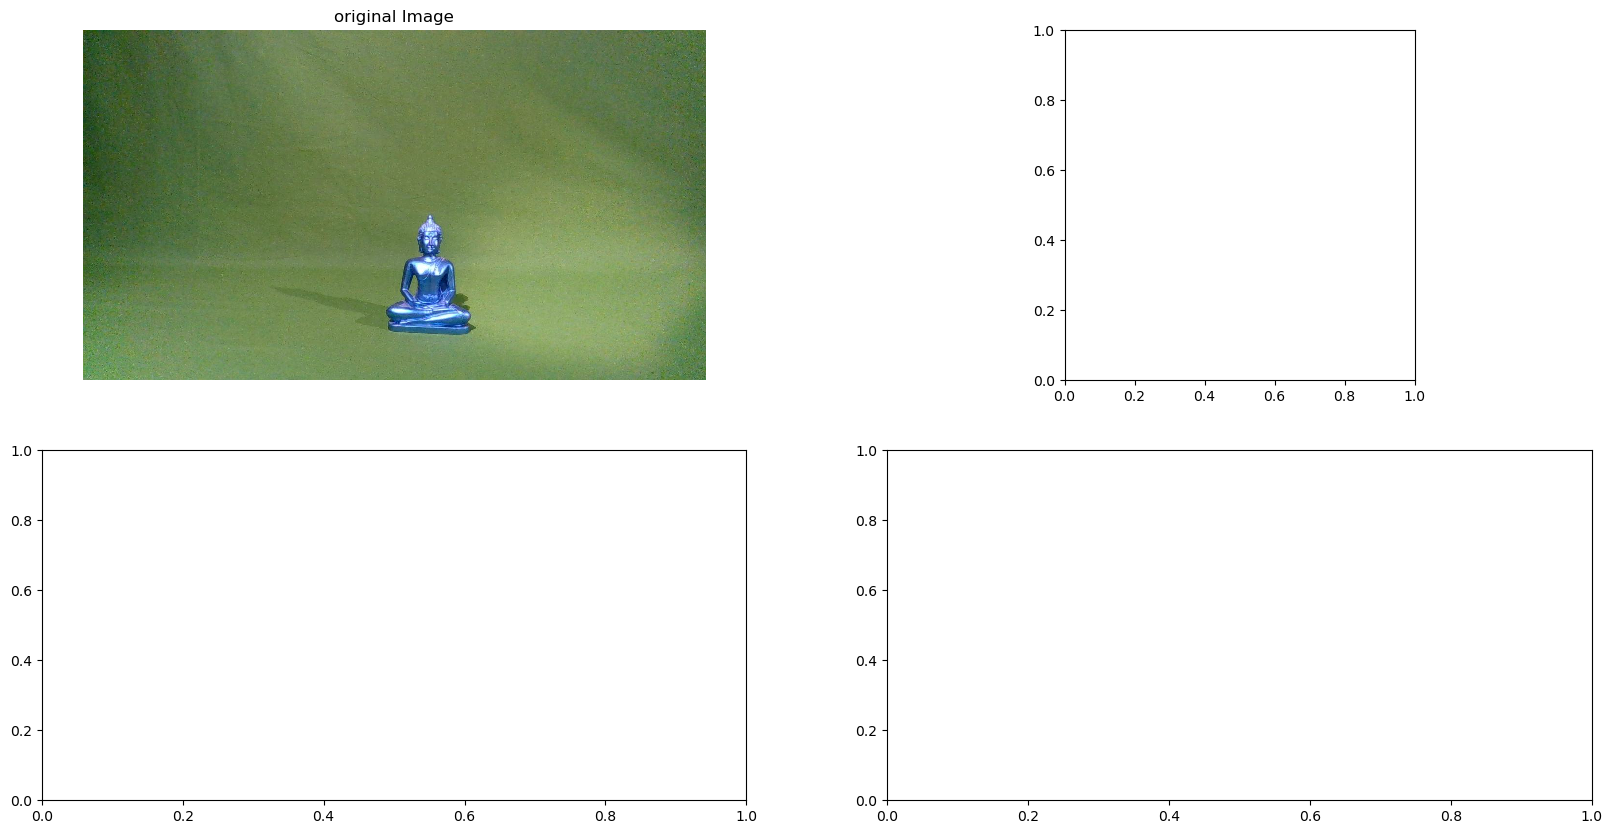

In [69]:
tensorFlow = cv2.imread("GeometricImages/Flipped/ZIDU IL LIBA IMAGE AW PLEASE")
pyTorch = cv2.imread("GeometricImages/Flipped/ZIDU IL LIBA IMAGE AW PLEASE")
part4 = cv2.imread("GeometricImages/Flipped/ZIDU IL LIBA IMAGE AW PLEASE")

Images = {
    OG_IMAGE: buddhaImg,
    TENSORFLOW_IMAGE : tensorFlow,
    PYTORCH_IMAGE : pyTorch,
    OUR_IMPLEMENTATION : part4
}

DisplayImages(Images,2,2)

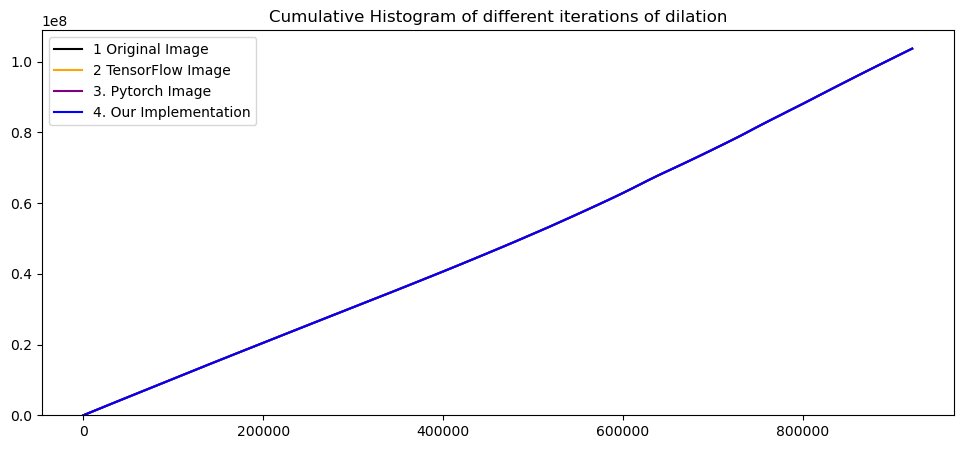

In [ ]:
cumulativeHistogramGeometric(Images)

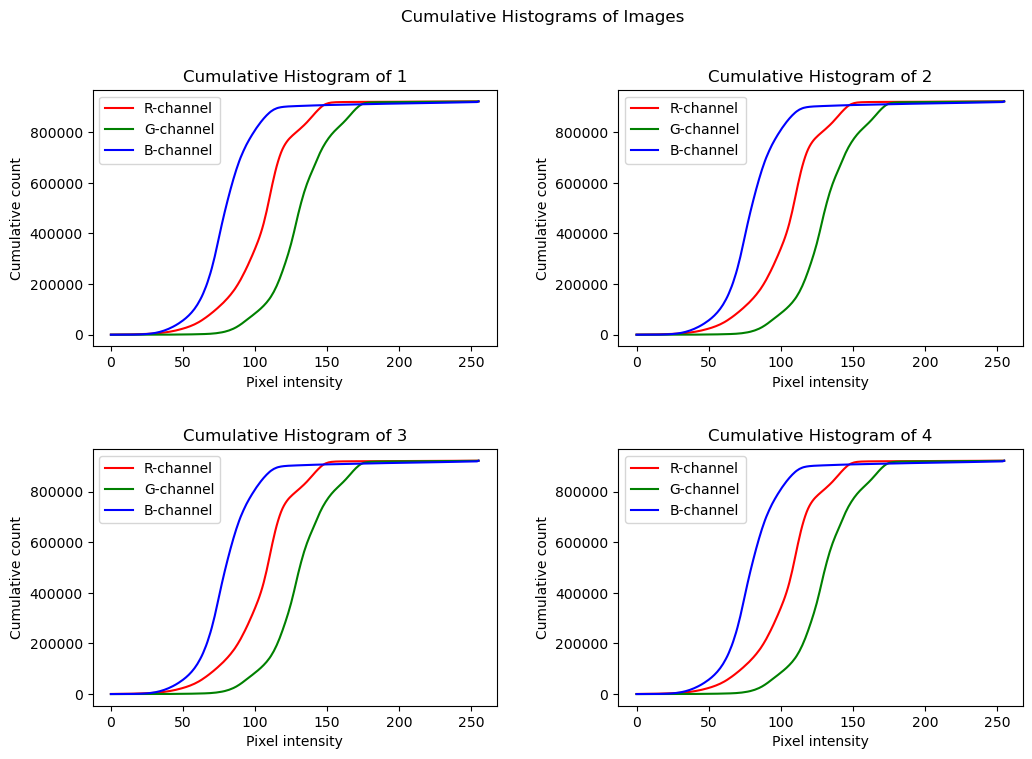

In [98]:
cumulativeHistogramPhotometric(Images)

In [109]:
def outputSSIM(Images):
    greyImages = {}
    for images in Images:
        greyImages[images] =  cv2.cvtColor(Images[images], cv2.COLOR_BGR2GRAY)

    result = cv2.matchTemplate(greyImages[OUR_IMPLEMENTATION], greyImages[OG_IMAGE], cv2.TM_CCOEFF_NORMED)
    ssim1 = result[0,0]
    result = cv2.matchTemplate(greyImages[OUR_IMPLEMENTATION], greyImages[PYTORCH_IMAGE], cv2.TM_CCOEFF_NORMED)
    ssim2 = result[0,0]
    result = cv2.matchTemplate(greyImages[OUR_IMPLEMENTATION], greyImages[TENSORFLOW_IMAGE], cv2.TM_CCOEFF_NORMED)
    ssim3 = result[0,0]

    print("SSIM of Part 4 vs Original Image: "  + str(ssim1))
    print("SSIM of Part 4 vs PyTorch Image" + str(ssim2))
    print("SSIM of Part 4 vs Tensorflow Image" + str(ssim3))

In [110]:
def outputMSE(Images):

    b1, g1, r1 = cv2.split(OUR_IMPLEMENTATION)
    b2, g2, r2 = cv2.split(OG_IMAGE)
    b3, g3, r3 = cv2.split(PYTORCH_IMAGE)
    b4, g4, r4 = cv2.split(TENSORFLOW_IMAGE)

    diff_b = (b1 - b2) ** 2
    MSE_bOG = diff_b.sum() / (b1.shape[0] * b1.shape[1])
    diff_g = (g1 - g2) ** 2
    MSE_gOG = diff_g.sum() / (g1.shape[0] * g1.shape[1])
    diff_r = (r1 - r2) ** 2
    MSE_rOG = diff_r.sum() / (r1.shape[0] * r1.shape[1])
    MSE_AVG = MSE_bOG + MSE_gOG + MSE_rOG / 3

    print("MSE of Part 4 vs Original Image: Red Channel"  + str(MSE_rOG))
    print("MSE of Part 4 vs Original Image: Green Channel"  + str(MSE_gOG))
    print("MSE of Part 4 vs Original Image: Blue Channel"  + str(MSE_bOG))
    print("MSE of Part 4 vs Original Image: Average Channel"  + str(MSE_AVG))

    diff_b = (b1 - b3) ** 2
    MSE_bOG = diff_b.sum() / (b1.shape[0] * b1.shape[1])
    diff_g = (g1 - g3) ** 2
    MSE_gOG = diff_g.sum() / (g1.shape[0] * g1.shape[1])
    diff_r = (r1 - r3) ** 2
    MSE_rOG = diff_r.sum() / (r1.shape[0] * r1.shape[1])
    MSE_AVG = MSE_bOG + MSE_gOG + MSE_rOG / 3

    print("MSE of Part 4 vs Pytorch Image: Red Channel"  + str(MSE_rOG))
    print("MSE of Part 4 vs Pytorch Image: Green Channel"  + str(MSE_gOG))
    print("MSE of Part 4 vs Pytorch Image: Blue Channel"  + str(MSE_bOG))
    print("MSE of Part 4 vs Pytorch Image: Average Channel"  + str(MSE_AVG))

    diff_b = (b1 - b4) ** 2
    MSE_bOG = diff_b.sum() / (b1.shape[0] * b1.shape[1])
    diff_g = (g1 - g4) ** 2
    MSE_gOG = diff_g.sum() / (g1.shape[0] * g1.shape[1])
    diff_r = (r1 - r4) ** 2
    MSE_rOG = diff_r.sum() / (r1.shape[0] * r1.shape[1])
    MSE_AVG = MSE_bOG + MSE_gOG + MSE_rOG / 3

    print("MSE of Part 4 vs Tensorflow Image: Red Channel"  + str(MSE_rOG))
    print("MSE of Part 4 vs Tensorflow Image: Green Channel"  + str(MSE_gOG))
    print("MSE of Part 4 vs Tensorflow Image: Blue Channel"  + str(MSE_bOG))
    print("MSE of Part 4 vs Tensorflow Image: Average Channel"  + str(MSE_AVG))

### Rotations

### Scaling

### Shearing

### Translation

### Crop

## Photometric Augmentation

### Brightness

### Colour Shift

### Constrast

### GaussianNoise

### Saturation

In [ ]:
# Create cumulative histogram
plt.figure(figsize=(40, 5))
plt.subplot(1, 3, 1)
colors = ['red', 'green', 'blue']
for i,image in enumerate(images):
    # Display histograms
    cumulativeHistogram = np.cumsum(image)
    plt.plot(cumulativeHistogram, color=colors[i])
    plt.hist(image.ravel(), 256, [0, 256], color='gray')
    plt.legend(('1 Iterations', '2 Iterations','3 Iterations'), loc='upper left')
    plt.title("Cumulative Histogram of different iterations of dilation")
plt.show() 